In [222]:
import os
os.chdir('/Volumes/Macintosh HD/_Drive/_data')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [223]:
iris = pd.read_csv('iris.csv')

In [224]:
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [225]:
iris.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [226]:
iris.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b7d29b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b0fb518>]], dtype=object)

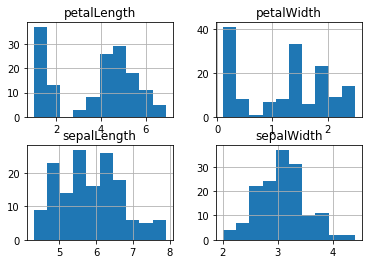

In [227]:
plt.show()

In [228]:
iris.pivot_table(index = 'species', aggfunc = 'mean')

,petalLength,petalWidth,sepalLength,sepalWidth
species,,,,
Iris-setosa,1.462,0.246,5.006,3.428
Iris-versicolor,4.260,1.326,5.936,2.770
Iris-virginica,5.552,2.026,6.588,2.974


In [229]:
colorDict = {}
colorDict['Iris-setosa'] = 'k'
colorDict['Iris-versicolor'] = 'b'
colorDict['Iris-virginica'] = 'r'

In [230]:
iris['color'] = iris['species'].map(colorDict)
iris['modelSpecies'] = ''
iris['score'] = 0

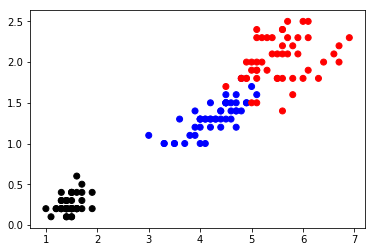

In [231]:
## By petalLength and petalWidth
plt.scatter(iris.petalLength, iris.petalWidth, color = iris.color)
plt.show()

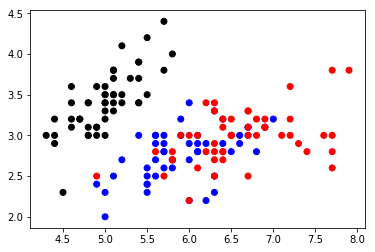

In [232]:
## By petalLength and petalWidth
plt.scatter(iris.sepalLength, iris.sepalWidth, color = iris.color)
plt.show()

In [251]:
train, test = train_test_split(iris, test_size = 0.2)

In [252]:
def bypetalSize(row):
    if row['petalLength'] < 2:
        val = 'Iris-setosa'
    else:
        val = 'Iris-virginica o Iris-versicolor'
    return val

In [253]:
def retrieveScore(row):
    if row['species'] == row['modelSpecies']:
        val = 1
    else:
        val = 0
    return val

In [254]:
iris['modelSpecies'] = iris.apply(bypetalSize, axis=1)
iris['score'] = iris.apply(retrieveScore, axis = 1)

In [255]:
X = train[['petalLength', 'petalWidth']] # Tomamos el ancho y longitud del pétalo.
Y = train['species'].astype('category')     # Para crear luego los gráficos vamos a necesitar categorizar los nombres
Y.cat.categories = [0, 1, 2]            # y asignarles un número a cada variedad de planta; en este caso tres.

In [256]:
n_neighbors = 10
h = .02         # step size de la malla
# Creamos los colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [257]:
for weights in ['uniform', 'distance']:
    # Creamos una instancia de Neighbors Classifier y hacemos un fit a partir de los
    # datos.
    # Los pesos (weights) determinarán en qué proporción participa cada punto en la
    # asignación del espacio. De manera uniforme o proporcional a la distancia.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, Y)
    # Creamos una gráfica con las zonas asignadas a cada categoría según el modelo
    # k-nearest neighborgs. Para ello empleamos el meshgrid de Numpy.
    # A cada punto del grid o malla le asignamos una categoría según el modelo knn.
    # La función c_() de Numpy, concatena columnas.
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Ponemos el resultado en un gráfico.
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Representamos también los datos de entrenamiento.
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel('Petal Width')
    plt.ylabel('Petal Length')
    plt.savefig('iris-knn-{}'.format(weights))

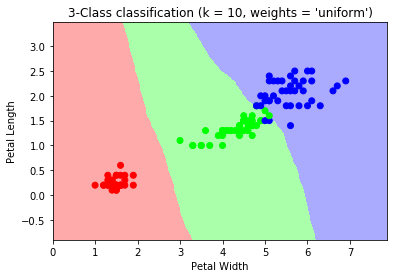

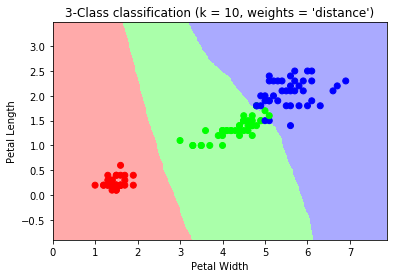

In [258]:
plt.show()

In [291]:
X = test[['petalLength', 'petalWidth']] # Tomamos el ancho y longitud del pétalo.
Y = test['species'].astype('category')     # Para crear luego los gráficos vamos a necesitar categorizar los nombres
Y.cat.categories = [0, 1, 2] 
Z = clf.predict(X)

In [301]:
Z = pd.DataFrame(Z)